# Application of classification models on medical heart disease data

In this project we will built all machine learning models for **classification** (shown below) using **scikit-learn**.
Our training data set contains continuous and categorical data from the **[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)** to predict whether or not a patient has **[heart disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)**.

In this lesson you will learn about...

- **Task 1: [Import the important library and exploring the dataset](#download-the-data)**

- **Task 2: [Missing Data](#identify-and-deal-with-missing-data)**
    - Identifying Missing Data
    - Dealing with Missing Data
    
- **Task 3: [Split the Data into Dependent and Independent Variables](#split-the-data)**

- **Task 4: [One-Hot Encoding](#one-hot-enc)**

- **Task 5: [Logistic regression model](#build-log)**

- **Task 6: [Support vector machine classifier model](#build-svm)**

- **Task 7: [K nearest neighbore classifier model](#build-knn)**

- **Task 8: [Naieve Bayes model](#build-nb)**

- **Task 9: [Decision Tree model](#build-dt)**

- **Task 10: [Random Forest model](#build-rf)**

#### NOTE:
This tutorial assumes that you are already know the basics of coding in **Python** and are familiar with the theory behind **Logistic Reression**, **Support Vector Machines**,**KNN**,**Naieve Bayes**, **Decision Tree** and **Random Forest** models.
Also you should be aware about **The GridSearchCV method**, **Radial Basis Function (RBF)**, **Regularization**, **Cross Validation** and **Confusion Matrices**.

***

<a id="download-the-data"></a>
# Task 1: Import the modules that will do all the work

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
# Importing models
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Importing processing functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.decomposition import PCA # to perform PCA to plot the data
from sklearn.preprocessing import scale # scale and center data
import copy
import matplotlib.colors as colors
%matplotlib inline

-----

## Import the data
Now we load in a dataset from the **[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)**.
Specifically, we are going to use the **[Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)**. This dataset will allow us to predict if someone has heart disease based on their sex, age, blood pressure and a variety of other metrics.

**NOTE:** When **pandas** (**pd**) reads in data, it returns a **data frame**, which is a lot like a spreadsheet. The data are organized in rows and columns and each row can contain a mixture of text and numbers. The standard variable name for a **data frame** is the initials **df**, and that is what we will use here:

In [2]:
df= pd.read_csv('processed.cleveland (1).data')

Now that we have loaded the data into a **data frame** called **df**, let's look at the first five rows using the `head()` function:

In [3]:
df.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


We see that instead of nice column names, we just have column numbers.  Since nice column names would make it easier to know how to format the data, let's replace the column numbers with the following column names:
- **age**,
- **sex**,
- **cp**, chest pain
- **restbp**, resting blood pressure (in mm Hg)
- **chol**, serum cholesterol in mg/dl
- **fbs**, fasting blood sugar
- **restecg**, resting electrocardiographic results
- **thalach**,  maximum heart rate achieved
- **exang**, exercise induced angina
- **oldpeak**, ST depression induced by exercise relative to rest
- **slope**, the slope of the peak exercise ST segment.
- **ca**, number of major vessels (0-3) colored by fluoroscopy
- **thal**, this is short of thalium heart scan.
- **hd**, diagnosis of heart disease, the predicted attribute

In [4]:
df.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


 We have replaced the column numbers with nice, easy to remember names. Now that we have the data in a **data frame** called **df**, we are ready to identify and deal with **Missing Data**.

----

<a id="identify-and-deal-with-missing-data"></a>
# Task 2: Identifying Missing Data and dealing with them.
Unfortunately, the biggest part of any data analysis project is making sure that the data is correctly formatted and fixing it when it is not. The first part of this process is dealing with **Missing Data**.

**Missing Data** is simply a blank space or surrogate value that indicates that we failed to collect data for one of the features. For example, if we forgot to ask someone's age, or forgot to write it down, then we would have a blank space in the dataset for that person's **age**.

There are two main ways to deal with missing data:
1. We can remove the rows that contain missing data from the dataset. This is relatively easy to do, but it wastes all of the other values that we collected. How a big of a waste this is depends on how important this missing value is for classification. For example, if we are missing a value for **age**, and **age** is not useful for classifying if people have heart disease or not, then it would be a shame to throw out all of someone's data just because we do not have their **age**.
2. We can **impute** the values that are missing. In this context **impute** is just a fancy way of saying "we can make an educated guess about about what the value should be". Continuing our example where we are missing a value for **age**, instead of throwing out the entire row of data, we can fill the missing value with the average age or the median age, or use some other, more sophisticated approach, to guess at an appropriate value.

In this section, we'll focus on identifying missing values in the dataset and dealing with them. 

First, let's see what sort of data is in each column.

In [5]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

We see that that they are almost all `float64`, however, two columns, **ca** and **thal**, have the `object` type and one column, **hd** has `int64`.

The fact that the **ca** and **thal** columns have `object` data types suggests there is something funny going on in them. `object` datatypes are used when there are mixtures of things, like a mixture of numbers and letters. In theory, both **ca** and **thal** should just have a few values representing different categories, so let's investigate what's going on by printing out their unique values. We'll start with **ca**:

In [6]:
df['ca'].unique()

array(['3.0', '2.0', '0.0', '1.0', '?'], dtype=object)

We see that **ca** contains numbers (0.0, 3.0, 2.0 and 1.0) and questions marks (?). The numbers represent the number of blood vessels that we lit up by fluoroscopy and the question marks represent missing data.

Now let's look at the unique values in **thal**.

In [7]:
df['thal'].unique()

array(['3.0', '7.0', '6.0', '?'], dtype=object)

Again, **thal** also contains a mixture of numbers, representing the different diagnoses from the thalium heart scan, and question marks, which represent missing values.

----

## Dealing With Missing Data

Since scikit-learn's support vector machines do not support datasets with missing values, we need to figure out what to do these question marks. We can either delete these patients from the training dataset, or impute values for the missing data. First let's see how many rows contain missing values.

In [8]:
len(df.loc[(df['ca']=='?')|(df['thal']=='?')])

6

Since only 6 rows have missing values, let's look at them.

In [9]:
df.loc[(df['ca']=='?')|(df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
86,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
165,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
191,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
265,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
286,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


Now let's count the number of rows in the full dataset.

In [10]:
len(df)

302

So 6 of the **303** rows, or **2%**, contain missing values. Since **303 - 6 = 297**, and **297** is plenty of data to build a support vector machine, we will remove the rows with missing values, rather than try to impute their values. We do this by selecting all of the rows that do not contain question marks in either the **ca** or **thal** columns:

In [11]:
no_miss=df.loc[(df['ca']!='?')&(df['thal']!='?')]

Since `df_no_missing` has **6** fewer rows than the original `df`, it should have **297** rows.

In [12]:
len(no_miss)

296

Hooray! The math works out. However, we can also make sure **ca** no longer contains question marks by printing its unique values:

In [13]:
no_miss['ca'].unique()

array(['3.0', '2.0', '0.0', '1.0'], dtype=object)

And we can also do the same thing for **thal**:

In [14]:
no_miss['thal'].unique()

array(['3.0', '7.0', '6.0'], dtype=object)

BAM! We have verified that `df_no_missing` does not contain any missing values. **NOTE:** **ca** and **thal** still have the `object` data type. That's OK. Now we are ready to format the data for making a **Support Vector Machine**.

----

<a id="split-the-data"></a>
# Task 3: Split the Data into Dependent and Independent Variables

Now that we have taken care of the missing data, we are ready to start formatting the data for making a **Support Vector Machine**.

The first step is to split the data into two parts:
1. The columns of data that we will use to make classifications
2. The column of data that we want to predict.

We will use the conventional notation of `X` (capital **X**) to represent the columns of data that we will use to make classifications and `y` (lower case **y**) to represent the thing we want to predict. In this case, we want to predict **hd** (heart disease).

**NOTE:** In the code below we are using `copy()` to copy the data *by value*. By default, pandas uses copy *by reference*. Using `copy()` ensures that the original data `df_no_missing` is not modified when we modify `X` or `y`. In other words, if we make a mistake when we are formatting the columns for support vector machines, we can just re-copy `df_no_missing`, rather than have to reload the original data and  remove the missing values etc.

In [15]:
x=no_miss.drop('hd',axis=1).copy()

In [16]:
y=no_miss['hd'].copy()

----

<a id="one-hot-enc"></a>
# Task 4: One-Hot Encoding

Now that we have split the data frame into two pieces, `X`, which contains the data we will use to make, or predict, classifications, and `y`, which contains the known classifications in our training dataset, we need to take a closer look at the variables in `X`. The list bellow tells us what each variable represents and the type of data (**float** or **categorical**) it should contain:

- **age**, **Float**
- **sex** - **Category**
  - 0 = female
  - 1 = male
- **cp**, chest pain, **Category**
  - 1 = typical angina,
  - 2 = atypical angina,
  - 3 = non-anginal pain,
  - 4 = asymptomatic
- **restbp**, resting blood pressure (in mm Hg), **Float**
- **chol**, serum cholesterol in mg/dl, **Float**
- **fbs**, fasting blood sugar, **Category**
  - 0 = >=120 mg/dl
  - 1 = <120 mg/dl
- **restecg**, resting electrocardiographic results, **Category**
  - 1 = normal
  - 2 = having ST-T wave abnormality
  - 3 = showing probable or definite left ventricular hypertrophy
- **thalach**,  maximum heart rate achieved, **Float**
- **exang**, exercise induced angina, **Category**
  - 0 = no
  - 1 = yes
- **oldpeak**, ST depression induced by exercise relative to rest. **Float**
- **slope**, the slope of the peak exercise ST segment, **Category**
  - 1 = upsloping
  - 2 = flat
  - 3 = downsloping
- **ca**, number of major vessels (0-3) colored by fluoroscopy, **Float**
- **thal**, thalium heart scan, **Category**
  - 3 = normal (no cold spots)
  - 6 = fixed defect (cold spots during rest and exercise)
  - 7 = reversible defect (when cold spots only appear during exercise)

Now, just to review, let's look at the data types in `X` to remember how python is seeing the data right now.

In [17]:
x.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

So, we see that **age**, **restbp**, **chol** and **thalach** are all `float64`, which is good, because we want them to be floating point numbers. All of the other columns, however, need to be inspected to make sure they only contain reasonable values, and some of them need to change. This is because, while **scikit learn Support Vector Machines** natively support continuous data, like resting blood preasure (**restbp**) and maximum heart rate (**thalach**), they do not natively support categorical data, like chest pain (**cp**), which contains 4 different categories. Thus, in order to use categorical data with **scikit learn Support Vector Machines**, we have to use a trick that converts a column of categorical data into multiple columns of binary values. This trick is called **One-Hot Encoding**.

At this point you may be wondering, "what's wrong with treating categorical data like continuous data?" To answer that question, let's look at an example: For the **cp** (chest pain) column, we have 4 options:
1. typical angina,
2. atypical angina,
3. non-anginal pain,
4. asymptomatic

If we treated these values, 1, 2, 3 and 4, like continuous data, then we would assume that 4, which means "asymptomatic", is more similar to 3, which means "non-anginal pain", than it is to 1 or 2, which are other types of chest pain. Thus, the support vector machine would be more likely to cluster the patients with 4s and 3s together than the patients with 4s and 1s together. In contrast, if we treat these numbers like categorical data, then we treat each one a separate category that is no more or less similar to any of the other categories. Thus, the likelihood of clustering patients with 4s with 3s is the same as clustering 4s with 1s, and that approach is more reasonable.

Now let's inspect and, if needed, convert the columns that contain categorical and integer data into the correct datatypes. We'll start with **cp** (chest pain) by inspecting all of its unique values:
<!-- We'll start with the three colunms that should only contain 0s and 1s. **sex**. First, let's make sure it only contains `0` (for **female**) and `1` (for **male**). -->

In [18]:
x['cp'].unique()

array([4., 3., 2., 1.])

So, the good news is that **cp** only contains the values it is supposed to contain, so we will convert it, using **One-Hot Encoding**, into a series of columns that only contains **0s** and **1s**.

<!-- Now we need to deal with **cp** (chest pain), **restecg** (resting electrocardiographic results), **slope** (the slope of the peak exercise ST segment) and **thal** (thalium heart scan).
 -->
**NOTE:** There are many different ways to do **One-Hot Encoding** in Python. Two of the more popular methods are `ColumnTransformer()` (from **scikit-learn**) and `get_dummies()` (from **pandas**), and the both methods have pros and cons. `ColumnTransformer()` has a very cool feature where it creates a persistent function that can validate data that you get in the future. For example, if you build your **Support Vector Machine** using a categorical variable **favorite color** that has **red**, **blue** and **green** options, then `ColumnTransformer()` can remember those options and later on when your **Support Vector Machine** is being used in a production system, if someone says their favorite color is **orange**, then `ColumnTransformer()` can throw an error or handle the situation in some other nice way. The downside of `ColumnTransformer()` is that it turns your data into an array and looses all of the column names, making it harder to verify that your usage of `ColumnTransformer()` worked as you intended it to. In contrast, `get_dummies()` leaves your data in a dataframe and retains the column names, making it much easier to verify that it worked as intended. However, it does not have the persistent behavior that `ColumnTransformer()` has. So, for the sake of learning how **One-Hot Encoding** works, I prefer to use `get_dummies()`. However, once you are comfortable with **One-Hot Encoding**, I encourage you to investigate using `ColumnTransformer()`.

First, before we commit to converting **cp** with **One-Hot Encoding**, let's just see what happens when we convert **cp** without saving the results. This will just make it easy to see how `get_dummies()` works.

In [19]:
pd.get_dummies(x,columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
1,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
2,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
3,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0
4,56.0,1.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,1,0,0


As we can see in the printout above, `get_dummies()` puts all of the columns it does not process in the front and it puts **cp** at the end. It also split **cp** into **4** columns, just like we expected it. **cp_1.0** is `1` for any patient that scored a **1** for chest pain and `0` for all other patients. **cp_2.0** is `1` for any patient that scored **2** for chest pain and `0` for all other patients. **cp_3.0** is `1` for any patient that scored **3** for chest pain and **cp_4.0** is `1` for any patient that scored **4** for chest pain.

Now that we see how `get_dummies()` works, let's use it on the four categorical columns that have more than 2 categories and save the result.

**NOTE:** In practice you should verify all 5 of these columns to make sure they only contain
the accepted categories.

In [20]:
x_encoded=pd.get_dummies(x, columns=['cp','restecg','slope','thal'])
x_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
1,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
2,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
3,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0
4,56.0,1.0,120.0,236.0,0.0,178.0,0.0,0.8,0.0,0,...,0,1,0,0,1,0,0,1,0,0


# BAM!!!
Now we need to talk about the **3** categorical columns that only contain **0**s and **1**s: **sex**, **fbs** (fasting blood sugar), and **exang** (exercise induced angina). As we can see, **One-Hot Encoding** converts a column with more than **2** categories, like **cp** (chest pain) into multiple columns of **0**s and **1**s. Since **sex**, **fbs**, and **exang** only have **2** categories and only contain **0**s and **1**s to begin with, we do not have to do anything special to them, so we're done formatting the data for the **Support Vector Machine**.

**NOTE:** In practice we would use `unique()` to verify that they only contain **0**s and **1**s, but to save time...trust me!

Now, one last thing before we build a Support Vector Machine.  `y` doesn't just contain **0**s and **1**s. Instead, it has **5** different levels of heart disease. **0 =** no heart disease and **1-4** are various degrees of heart disease. We can see this with `unique()`:

In [21]:
y.unique()

array([2, 1, 0, 3, 4], dtype=int64)

Since we're only making a support vector machine that does simple classification and only care if someone has heart disease or not, we need to convert all numbers **> 0** to **1**.

In [22]:
    y1=y>0
    y[y1]=1
    y.unique()

array([1, 0], dtype=int64)

# Double BAM!!!

We have finally finished formatting the data for making a **Support Vector Machine**, so let's do it!!!

----

<a id="build-log"></a>
# Task 5: Logistic regression model

In [23]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 41)

In [24]:
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [25]:
# Fitting Logistic Regression to the Training set
Logreg = LogisticRegression(random_state = 0)
Logreg.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [26]:
# Predicting the Test set results
y_pred = Logreg.predict(x_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[34,  4],
       [11, 25]], dtype=int64)

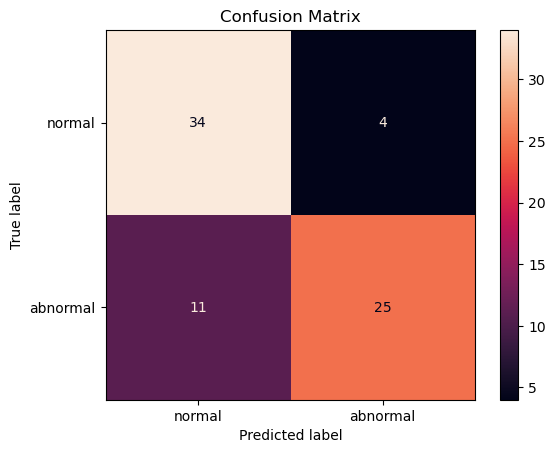

In [27]:
# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'abnormal'])
disp.plot(cmap='rocket')
plt.title('Confusion Matrix')
plt.show()

In [28]:
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        38
           1       0.86      0.69      0.77        36

    accuracy                           0.80        74
   macro avg       0.81      0.79      0.79        74
weighted avg       0.81      0.80      0.79        74



In [29]:
acc=accuracy_score(y_test, y_pred)
print('Accurcy of logistic model: ',acc *100,'%')

Accurcy of logistic model:  79.72972972972973 %


<a id="build-svm"></a>
# Task 6: SVM model

In [23]:
# Train test x_train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)

In [24]:
# Normalizing data
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)

### Optimize Parameters with Cross Validation

Optimizing a **Support Vector Machine** is all about finding the best value for **gamma**, and, potentially, the regularization parameter, **C**. So let's see if we can find better parameters using cross validation in hopes that we can improve the accuracy with the **Testing Dataset**.

Since we have to parameters two optimize, we will use `GridSearchCV()`. We do this by specifying potential values for **gamma** and **C**, and `GridSearchCV()` tests all possible combinations of the parameters for us.

In [25]:
# Choosing best kernel for SVM
for k in ('linear','poly','rbf','sigmoid'):
    clf=svm.SVC(kernel=k)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_train)
    print(k)
    print(accuracy_score(y_train,y_pred))

linear
0.8558558558558559
poly
0.9234234234234234
rbf
0.9009009009009009
sigmoid
0.8243243243243243


In [26]:
# Define the parameter grid to search
param_grid = {'C': [0.001,0.1, 1, 10,100],'kernel': ['poly'],'gamma': [10,1,0.1, 0.01, 0.001, 0.0001]}

# Create an SVM classifier
grid = GridSearchCV(SVC(), param_grid, refit = True,cv=5,verbose=0)
# CV is cross validation ya3ny y3ml test be kam sample 3la kol compination
# verbose and n_jobs fe elback end bygbly 3ml eh blzbt fmsh lazm a7otohom (verbose = 5,n_jobs=-1,) 

# fitting the model for grid search 
grid.fit(x_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(x_train) 

{'C': 0.001, 'gamma': 1, 'kernel': 'poly'}


### Building, Evaluating, Drawing, and Interpreting the Final Support Vector Machine

Now that we have the ideal values for `C` and `gamma` we can build the final **Support Vector Machine**:

In [27]:
# Installing the best model
clf=svm.SVC(kernel='poly', C=0.001, gamma=1)
clf.fit(x_train,y_train)

SVC(C=0.001, gamma=1, kernel='poly')

In [28]:
# Testing set prediction
x_test = sc.transform(x_test)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.8918918918918919


In [29]:
# Percision and recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        43
           1       0.85      0.90      0.88        31

    accuracy                           0.89        74
   macro avg       0.89      0.89      0.89        74
weighted avg       0.89      0.89      0.89        74



In [30]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[38,  5],
       [ 3, 28]], dtype=int64)

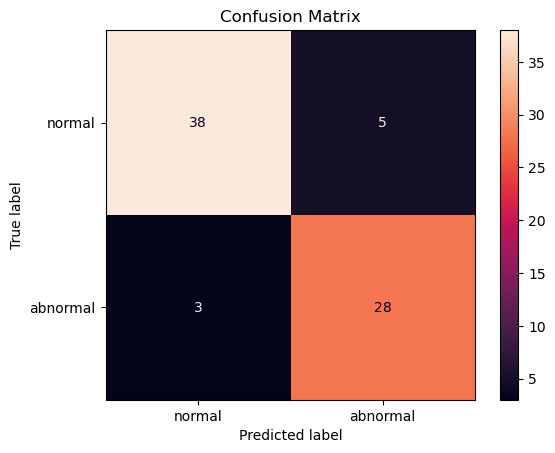

In [31]:
# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'abnormal'])
disp.plot(cmap='rocket')
plt.title('Confusion Matrix')
plt.show()

In [32]:
acc=accuracy_score(y_test, y_pred)
print('Accurcy of Support vector machine classification model: ',acc *100,'%')

Accurcy of Support vector machine classification model:  89.1891891891892 %


-----

<a id="build-knn"></a>
# Task 7: K nearest neighbore classifier model.

In [23]:
# Train test x_train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)

In [24]:
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [25]:
# Define the parameter grid to search
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11]  # Test different values of k
}

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(x, y)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

C:\Users\dell-5580\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\dell-5580\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

Best Parameters: {'n_neighbors': 11}
Best Score: 0.6724293785310735


C:\Users\dell-5580\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [41]:
# Create a KNN classifier with a specified number of neighbors (k)
k_neighbors = 11
knn_classifier = KNeighborsClassifier(n_neighbors=k_neighbors)

In [42]:
# Fit the model to the training data
knn_classifier.fit(x_train, y_train)
# Make predictions on the test data
y_pred = knn_classifier.predict(x_test)

C:\Users\dell-5580\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [43]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[38,  5],
       [ 3, 28]], dtype=int64)

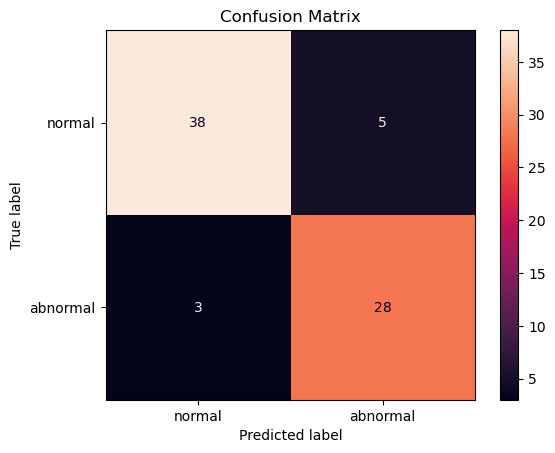

In [44]:
# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'abnormal'])
disp.plot(cmap='rocket')
plt.title('Confusion Matrix')
plt.show()

In [45]:
# Calculate and print the accuracy score
acc=accuracy_score(y_test, y_pred)
print('Accurcy of KNN model: ',acc *100,'%')

Accurcy of KNN model:  89.1891891891892 %


<a id="build-nb"></a>
# Task 8: Nieve Bayes model.

In [24]:
# Train test x_train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)

In [25]:
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [26]:
# Create and fit a Naive Bayes classifier
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [27]:
y_pred = nb.predict(x_test)

In [28]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[38,  5],
       [ 3, 28]], dtype=int64)

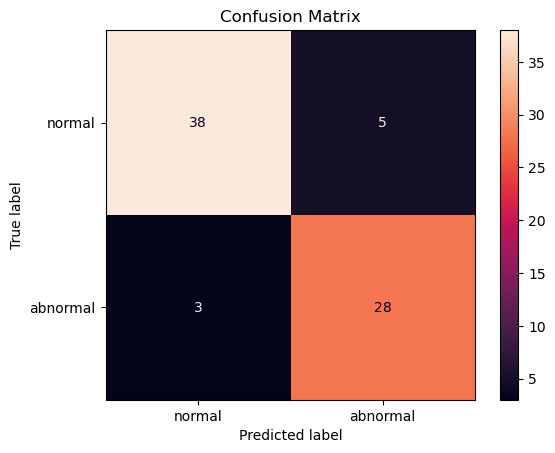

In [29]:
# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'abnormal'])
disp.plot(cmap='rocket')
plt.title('Confusion Matrix')
plt.show()

In [30]:
# Calculate and print the accuracy score
acc=accuracy_score(y_test, y_pred)
print('Accurcy of Naive Bayes model: ',acc *100,'%')

Accurcy of Naive Bayes model:  89.1891891891892 %


<a id="build-dt"></a>
# Task 9: Decision Tree model.

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [31]:
param=[{
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 50, 100],
    'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']}]

gs=GridSearchCV(DecisionTreeClassifier(),param, cv=5, n_jobs=-1,verbose=0)
gs.fit(x_train,y_train)
gs.best_params_

C:\Users\dell-5580\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5040 fits failed out of a total of 50400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5040 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dell-5580\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell-5580\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\dell-5580\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 314, in fit
    raise ValueError(
ValueError: max_leaf_nodes 1 must be either None or larger

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'max_leaf_nodes': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'best'}

In [52]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=7, max_features='sqrt', max_leaf_nodes=8,min_samples_leaf=4,
min_samples_split=2,splitter='best',random_state =0)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, max_features='sqrt', max_leaf_nodes=8,
                       min_samples_leaf=4, random_state=0)

In [53]:
y_pred = dt.predict(x_test)

In [54]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[35,  8],
       [ 8, 23]], dtype=int64)

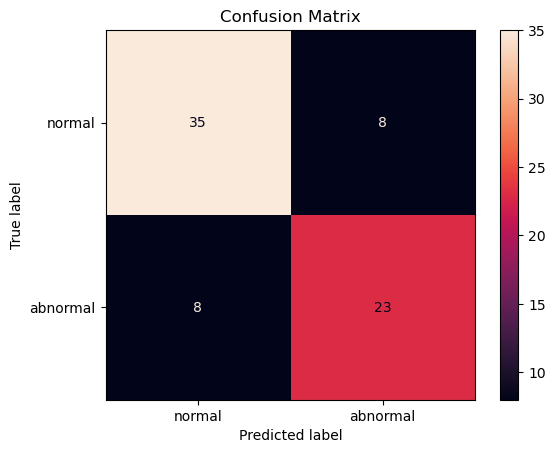

In [55]:
# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'abnormal'])
disp.plot(cmap='rocket')
plt.title('Confusion Matrix')
plt.show()

In [56]:
# Calculate and print the accuracy score
acc=accuracy_score(y_test, y_pred)
print('Accurcy of Decision Tree model: ',acc *100,'%')

Accurcy of Decision Tree model:  78.37837837837837 %


<a id="build-rf"></a>
# Task 10: Random Forest model.

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [42]:
param_dist = {'n_estimators': [50, 100, 200],  # Add the desired values for n_estimators
    'max_depth': [None, 10, 20],
    'max_leaf_nodes': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']}

rf_classifier = RandomForestClassifier()
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist,n_iter=10, cv=5, n_jobs=-1, verbose=1, random_state=42)
random_search.fit(x_train, y_train)
best_rf_params = random_search.best_params_
best_rf_classifier = random_search.best_estimator_

print("Best Parameters:", best_rf_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': None, 'max_features': 'auto', 'max_depth': 10}


In [43]:
# Fitting Random Forest Classification to the Training set
rf = RandomForestClassifier(n_estimators=1000,min_samples_split=2,min_samples_leaf=2,max_leaf_nodes=None,max_features='auto',max_depth= 10, random_state = 0)
rf.fit(x_train, y_train)

# Predicting the Test set results
y_pred = rf.predict(x_test)

In [44]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[37,  6],
       [ 6, 25]], dtype=int64)

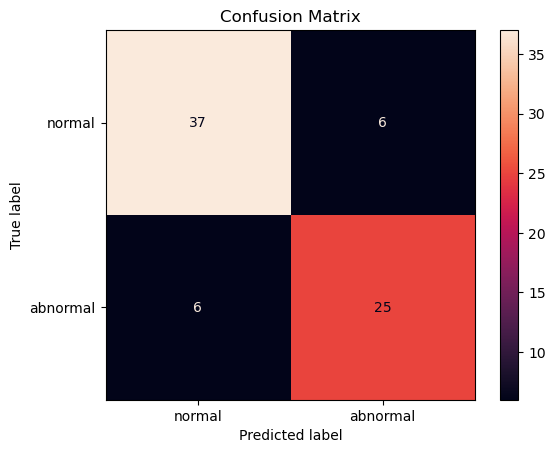

In [45]:
# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'abnormal'])
disp.plot(cmap='rocket')
plt.title('Confusion Matrix')
plt.show()

In [46]:
# Calculate and print the accuracy score
acc=accuracy_score(y_test, y_pred)
print('Accurcy of Random forest model: ',acc *100,'%')

Accurcy of Random forest model:  83.78378378378379 %


**Learning Curve: Line plot of learning (y-axis) over experience (x-axis).**

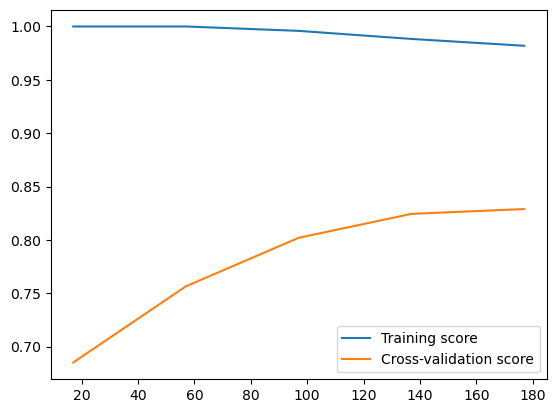

In [48]:
from sklearn.model_selection import learning_curve

# Example of plotting learning curves
train_sizes, train_scores, test_scores = learning_curve(
    classifier, x_train, y_train, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.legend()
plt.show()

The curve suggests that the model is learning and generalizing fairly well, but there might still be a slight amount of overfitting due to the training score decreasing from 1 to 0.97.

# In conclusion we have this values for accuracy:
​
- **Task 5: [Logistic regression model](#build-log)=79.73%**
​
- **Task 6: [Support vector machine classifier model](#build-svm)=89.19%**
​
- **Task 7: [K nearest neighbore classifier model](#build-knn)=89.19%**
​
- **Task 8: [Naieve Bayes model](#build-nb)=89.18%**
​
- **Task 9: [Decision Tree model](#build-dt)=78.37%**
​
- **Task 10: [Random Forest model](#build-rf)=83.78%**